# Buy Prediction Algorithm NZD-USD
This notebook aims to minimize the clasification loss between No Action and Buy Action

### Imports

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [138]:
ticker = "NZDUSD=X"
supporting_predictor_names = [
    'RAW-EMA-2',
    'RAW-EMA-3',
    'RAW-EMA-5',
    'RAW-EMA-7',
    'RAW-EMA-21',
    'RAW-EMA-50'
]

## Pre Algorithm

### Read Dataset

In [139]:
predictors = pd.read_csv('./' + ticker + '_input_signals.csv')
predictors_list = list(predictors.columns)
supporting_predictors = predictors[supporting_predictor_names]
predictors = predictors.drop(supporting_predictor_names, axis = 1)
predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.000200,0.008570,0.020727,0.676821,-0.000012,0.443293,0.001506,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.000165,0.007809,0.019934,0.677012,-0.000312,0.448389,0.001548,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,-0.001699,0.004889,0.016817,0.627907,-0.000714,0.445866,0.001813,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.004545,0.011499,0.023613,0.702180,-0.000507,0.446968,0.002553,0.010210,-0.000365,-0.009845


In [140]:
target = pd.read_csv('./' + ticker + '_output_signals.csv')
#target

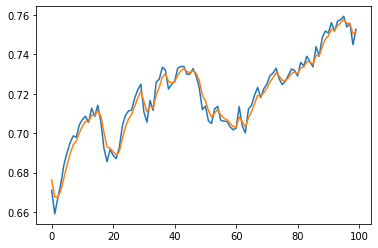

In [141]:
adj_close = predictors["Adj Close"].to_numpy()[1000:1100]
ema = supporting_predictors["RAW-EMA-3"].to_numpy()[1000:1100]

plt.plot(adj_close)
plt.plot(ema)

### Train Test Split

In [142]:
from sklearn.model_selection import train_test_split
train_predictors, test_predictors, train_targets, test_targets = train_test_split(
        predictors,
        target,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [143]:
train_predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.711389,0.721397,0.706115,0.711389,0.711389,0,0.002049,0.004421,0.008140,0.008589,...,0.005383,0.011778,0.012642,0.702257,0.001591,0.269600,0.003351,0.013403,-0.002062,-0.011341
2973,0.708918,0.713089,0.708898,0.708818,0.708818,0,-0.002572,-0.000523,0.001849,0.005568,...,0.002108,0.008369,0.009676,0.649917,0.001377,0.291316,0.002741,0.010965,-0.004618,-0.006347
2974,0.710071,0.711389,0.707469,0.710021,0.710021,0,0.001203,-0.001369,0.000680,0.003052,...,0.002483,0.008702,0.010452,0.662584,0.001218,0.306916,0.001453,0.005811,-0.002193,-0.003619
2975,0.708848,0.715129,0.707569,0.709019,0.709019,0,-0.001002,0.000201,-0.002371,-0.000322,...,0.001111,0.007000,0.009080,0.641756,0.000959,0.324997,0.000930,0.003721,-0.002559,-0.001162


### More Preprocessing

In [144]:
train_targets = np.ravel(train_targets)
test_targets = np.ravel(test_targets)

### Utility

## Algorithm 3 - Neural Networks

In [145]:
# Imports
import keras
from keras import models
from keras import layers

In [146]:
# Training Validation Split
the_train_predictors, test_validation_predictors, the_train_targets, test_validation_targets = train_test_split(
        train_predictors,
        train_targets,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [147]:
print("Features : " + str(train_predictors.shape[1]))

Features : 24


In [148]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(80, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(60, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(30, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [149]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [150]:
history = model.fit(
    the_train_predictors,
    the_train_targets,
    epochs=20,
    batch_size=512,
    validation_data=(test_validation_predictors, test_validation_targets)
)

Epoch 1/20
5/5 [==============================] - 7s 266ms/step - loss: 0.6212 - accuracy: 0.9112 - val_loss: 0.4778 - val_accuracy: 0.9027
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 0.4313 - accuracy: 0.9042 - val_loss: 0.3448 - val_accuracy: 0.9027
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.3262 - accuracy: 0.9051 - val_loss: 0.3154 - val_accuracy: 0.9027
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 0.3039 - accuracy: 0.9077 - val_loss: 0.3135 - val_accuracy: 0.9027
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3164 - accuracy: 0.9020 - val_loss: 0.3135 - val_accuracy: 0.9027
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 0.2985 - accuracy: 0.9099 - val_loss: 0.3127 - val_accuracy: 0.9027
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.3023 - accuracy: 0.9070 - val_loss: 0.3119 - val_accuracy: 0.9027
Epoch 8/20
5/5 [==========

In [151]:
results = model.evaluate(test_predictors, test_targets)
results

24/24 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.9074


[0.28684982657432556, 0.9073825478553772]

In [152]:
(list(reversed(sorted(model.predict(test_predictors)))))

[array([0.3077476], dtype=float32),
 array([0.29135707], dtype=float32),
 array([0.28636384], dtype=float32),
 array([0.22467875], dtype=float32),
 array([0.20930007], dtype=float32),
 array([0.19164473], dtype=float32),
 array([0.18793774], dtype=float32),
 array([0.1671944], dtype=float32),
 array([0.1570962], dtype=float32),
 array([0.14700687], dtype=float32),
 array([0.14601418], dtype=float32),
 array([0.14581075], dtype=float32),
 array([0.14457965], dtype=float32),
 array([0.14311159], dtype=float32),
 array([0.14311105], dtype=float32),
 array([0.1427165], dtype=float32),
 array([0.1422463], dtype=float32),
 array([0.14204028], dtype=float32),
 array([0.14184177], dtype=float32),
 array([0.14134502], dtype=float32),
 array([0.14130998], dtype=float32),
 array([0.14083979], dtype=float32),
 array([0.13981101], dtype=float32),
 array([0.13952494], dtype=float32),
 array([0.13831794], dtype=float32),
 array([0.13703078], dtype=float32),
 array([0.13656169], dtype=float32),
 array

## Algorithm 2 - Random Forests + XGBoost

In [153]:
# Imports
import xgboost as xgb
import graphviz

In [154]:
param_dist = {
    'objective':'binary:logistic',
    'learning_rate':0.1,
    'max_depth': 3,
    'n_estimators': 1000
}

clf = xgb.XGBClassifier(**param_dist)

clf.fit(
    train_predictors, train_targets,
    eval_set=[(train_predictors, train_targets), (test_predictors, test_targets)],
    eval_metric='logloss',
    verbose=True
)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.62472	validation_1-logloss:0.62859
[1]	validation_0-logloss:0.56862	validation_1-logloss:0.57440
[2]	validation_0-logloss:0.52192	validation_1-logloss:0.52800
[3]	validation_0-logloss:0.48209	validation_1-logloss:0.48877
[4]	validation_0-logloss:0.44794	validation_1-logloss:0.45458
[5]	validation_0-logloss:0.41866	validation_1-logloss:0.42535


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[6]	validation_0-logloss:0.39339	validation_1-logloss:0.39992
[7]	validation_0-logloss:0.37179	validation_1-logloss:0.37859
[8]	validation_0-logloss:0.35254	validation_1-logloss:0.36025
[9]	validation_0-logloss:0.33567	validation_1-logloss:0.34358
[10]	validation_0-logloss:0.32083	validation_1-logloss:0.32889
[11]	validation_0-logloss:0.30774	validation_1-logloss:0.31590
[12]	validation_0-logloss:0.29614	validation_1-logloss:0.30438
[13]	validation_0-logloss:0.28585	validation_1-logloss:0.29415
[14]	validation_0-logloss:0.27661	validation_1-logloss:0.28553
[15]	validation_0-logloss:0.26840	validation_1-logloss:0.27751
[16]	validation_0-logloss:0.26107	validation_1-logloss:0.27012
[17]	validation_0-logloss:0.25452	validation_1-logloss:0.26339
[18]	validation_0-logloss:0.24865	validation_1-logloss:0.25790
[19]	validation_0-logloss:0.24340	validation_1-logloss:0.25268
[20]	validation_0-logloss:0.23871	validation_1-logloss:0.24777
[21]	validation_0-logloss:0.23450	validation_1-logloss:0.24

[136]	validation_0-logloss:0.14268	validation_1-logloss:0.21214
[137]	validation_0-logloss:0.14225	validation_1-logloss:0.21376
[138]	validation_0-logloss:0.14208	validation_1-logloss:0.21380
[139]	validation_0-logloss:0.14146	validation_1-logloss:0.21369
[140]	validation_0-logloss:0.14088	validation_1-logloss:0.21386
[141]	validation_0-logloss:0.14060	validation_1-logloss:0.21438
[142]	validation_0-logloss:0.13976	validation_1-logloss:0.21444
[143]	validation_0-logloss:0.13942	validation_1-logloss:0.21447
[144]	validation_0-logloss:0.13910	validation_1-logloss:0.21467
[145]	validation_0-logloss:0.13837	validation_1-logloss:0.21506
[146]	validation_0-logloss:0.13772	validation_1-logloss:0.21549
[147]	validation_0-logloss:0.13743	validation_1-logloss:0.21543
[148]	validation_0-logloss:0.13717	validation_1-logloss:0.21600
[149]	validation_0-logloss:0.13698	validation_1-logloss:0.21604
[150]	validation_0-logloss:0.13649	validation_1-logloss:0.21609
[151]	validation_0-logloss:0.13603	valid

[265]	validation_0-logloss:0.09584	validation_1-logloss:0.22029
[266]	validation_0-logloss:0.09572	validation_1-logloss:0.22036
[267]	validation_0-logloss:0.09557	validation_1-logloss:0.22034
[268]	validation_0-logloss:0.09496	validation_1-logloss:0.22019
[269]	validation_0-logloss:0.09490	validation_1-logloss:0.22055
[270]	validation_0-logloss:0.09473	validation_1-logloss:0.22016
[271]	validation_0-logloss:0.09430	validation_1-logloss:0.22013
[272]	validation_0-logloss:0.09373	validation_1-logloss:0.22013
[273]	validation_0-logloss:0.09360	validation_1-logloss:0.22013
[274]	validation_0-logloss:0.09329	validation_1-logloss:0.22002
[275]	validation_0-logloss:0.09304	validation_1-logloss:0.22025
[276]	validation_0-logloss:0.09275	validation_1-logloss:0.22068
[277]	validation_0-logloss:0.09237	validation_1-logloss:0.22072
[278]	validation_0-logloss:0.09198	validation_1-logloss:0.22134
[279]	validation_0-logloss:0.09153	validation_1-logloss:0.22157
[280]	validation_0-logloss:0.09131	valid

[394]	validation_0-logloss:0.06638	validation_1-logloss:0.22748
[395]	validation_0-logloss:0.06624	validation_1-logloss:0.22735
[396]	validation_0-logloss:0.06610	validation_1-logloss:0.22747
[397]	validation_0-logloss:0.06575	validation_1-logloss:0.22742
[398]	validation_0-logloss:0.06555	validation_1-logloss:0.22705
[399]	validation_0-logloss:0.06541	validation_1-logloss:0.22722
[400]	validation_0-logloss:0.06528	validation_1-logloss:0.22743
[401]	validation_0-logloss:0.06508	validation_1-logloss:0.22721
[402]	validation_0-logloss:0.06485	validation_1-logloss:0.22713
[403]	validation_0-logloss:0.06465	validation_1-logloss:0.22719
[404]	validation_0-logloss:0.06454	validation_1-logloss:0.22744
[405]	validation_0-logloss:0.06432	validation_1-logloss:0.22762
[406]	validation_0-logloss:0.06416	validation_1-logloss:0.22763
[407]	validation_0-logloss:0.06392	validation_1-logloss:0.22814
[408]	validation_0-logloss:0.06374	validation_1-logloss:0.22818
[409]	validation_0-logloss:0.06347	valid

[523]	validation_0-logloss:0.04781	validation_1-logloss:0.23823
[524]	validation_0-logloss:0.04768	validation_1-logloss:0.23835
[525]	validation_0-logloss:0.04752	validation_1-logloss:0.23792
[526]	validation_0-logloss:0.04739	validation_1-logloss:0.23835
[527]	validation_0-logloss:0.04724	validation_1-logloss:0.23857
[528]	validation_0-logloss:0.04716	validation_1-logloss:0.23875
[529]	validation_0-logloss:0.04699	validation_1-logloss:0.23858
[530]	validation_0-logloss:0.04688	validation_1-logloss:0.23880
[531]	validation_0-logloss:0.04684	validation_1-logloss:0.23868
[532]	validation_0-logloss:0.04678	validation_1-logloss:0.23852
[533]	validation_0-logloss:0.04663	validation_1-logloss:0.23893
[534]	validation_0-logloss:0.04651	validation_1-logloss:0.23877
[535]	validation_0-logloss:0.04637	validation_1-logloss:0.23922
[536]	validation_0-logloss:0.04624	validation_1-logloss:0.23927
[537]	validation_0-logloss:0.04616	validation_1-logloss:0.23944
[538]	validation_0-logloss:0.04607	valid

[652]	validation_0-logloss:0.03587	validation_1-logloss:0.25314
[653]	validation_0-logloss:0.03572	validation_1-logloss:0.25326
[654]	validation_0-logloss:0.03564	validation_1-logloss:0.25373
[655]	validation_0-logloss:0.03558	validation_1-logloss:0.25379
[656]	validation_0-logloss:0.03548	validation_1-logloss:0.25353
[657]	validation_0-logloss:0.03542	validation_1-logloss:0.25339
[658]	validation_0-logloss:0.03533	validation_1-logloss:0.25357
[659]	validation_0-logloss:0.03529	validation_1-logloss:0.25372
[660]	validation_0-logloss:0.03522	validation_1-logloss:0.25386
[661]	validation_0-logloss:0.03517	validation_1-logloss:0.25380
[662]	validation_0-logloss:0.03509	validation_1-logloss:0.25398
[663]	validation_0-logloss:0.03500	validation_1-logloss:0.25401
[664]	validation_0-logloss:0.03488	validation_1-logloss:0.25393
[665]	validation_0-logloss:0.03483	validation_1-logloss:0.25408
[666]	validation_0-logloss:0.03480	validation_1-logloss:0.25406
[667]	validation_0-logloss:0.03469	valid

[781]	validation_0-logloss:0.02701	validation_1-logloss:0.26574
[782]	validation_0-logloss:0.02694	validation_1-logloss:0.26567
[783]	validation_0-logloss:0.02692	validation_1-logloss:0.26552
[784]	validation_0-logloss:0.02689	validation_1-logloss:0.26547
[785]	validation_0-logloss:0.02682	validation_1-logloss:0.26597
[786]	validation_0-logloss:0.02673	validation_1-logloss:0.26609
[787]	validation_0-logloss:0.02668	validation_1-logloss:0.26627
[788]	validation_0-logloss:0.02659	validation_1-logloss:0.26697
[789]	validation_0-logloss:0.02653	validation_1-logloss:0.26729
[790]	validation_0-logloss:0.02645	validation_1-logloss:0.26784
[791]	validation_0-logloss:0.02642	validation_1-logloss:0.26806
[792]	validation_0-logloss:0.02635	validation_1-logloss:0.26801
[793]	validation_0-logloss:0.02629	validation_1-logloss:0.26805
[794]	validation_0-logloss:0.02626	validation_1-logloss:0.26793
[795]	validation_0-logloss:0.02619	validation_1-logloss:0.26788
[796]	validation_0-logloss:0.02613	valid

[910]	validation_0-logloss:0.02110	validation_1-logloss:0.27638
[911]	validation_0-logloss:0.02103	validation_1-logloss:0.27629
[912]	validation_0-logloss:0.02097	validation_1-logloss:0.27636
[913]	validation_0-logloss:0.02094	validation_1-logloss:0.27642
[914]	validation_0-logloss:0.02092	validation_1-logloss:0.27666
[915]	validation_0-logloss:0.02088	validation_1-logloss:0.27677
[916]	validation_0-logloss:0.02083	validation_1-logloss:0.27736
[917]	validation_0-logloss:0.02080	validation_1-logloss:0.27741
[918]	validation_0-logloss:0.02075	validation_1-logloss:0.27744
[919]	validation_0-logloss:0.02071	validation_1-logloss:0.27773
[920]	validation_0-logloss:0.02067	validation_1-logloss:0.27777
[921]	validation_0-logloss:0.02061	validation_1-logloss:0.27788
[922]	validation_0-logloss:0.02057	validation_1-logloss:0.27772
[923]	validation_0-logloss:0.02053	validation_1-logloss:0.27772
[924]	validation_0-logloss:0.02049	validation_1-logloss:0.27783
[925]	validation_0-logloss:0.02046	valid

In [155]:
# d=3 -> 0.07975 -> 0.22400
# d =2 -> 0.13282 -> 0.21438
# d = 1 -> 0.18601 -> 0.20780

prediction = clf.predict(test_predictors)
prediction_probability = clf.predict_proba(test_predictors)
#prediction_probability[7]
df_pred_test = pd.DataFrame({
    "P": prediction,
    "R": test_targets
})
sum(prediction)

77

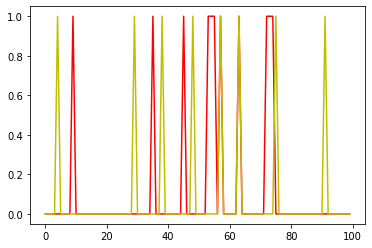

In [156]:
pruning_start = 300
pruning_end = 400

# pruned_predictions = prediction_probability.T[1][pruning_start:pruning_end]
# x = pd.DataFrame(pruned_predictions)
# pruned_predictions = x[x > 0.0000005].to_numpy()

pruned_predictions = prediction[pruning_start:pruning_end]

pruned_test_targets = test_targets[pruning_start:pruning_end]
plt.plot(pruned_predictions, c="r")
plt.plot(pruned_test_targets, c="y")
plt.show()

In [157]:
test_supporting_predictors = supporting_predictors[-test_predictors.shape[0]:]
test_supporting_predictors

,RAW-EMA-2,RAW-EMA-3,RAW-EMA-5,RAW-EMA-7,RAW-EMA-21,RAW-EMA-50
2977,0.715858,0.714738,0.713035,0.711633,0.704507,0.701200
2978,0.716979,0.716139,0.714537,0.713110,0.705692,0.701841
2979,0.715292,0.715294,0.714507,0.713445,0.706488,0.702335
2980,0.718863,0.717971,0.716554,0.715246,0.707775,0.703053
2981,0.723674,0.722025,0.719729,0.717954,0.709439,0.703956
...,...,...,...,...,...,...
3717,0.704407,0.704694,0.704563,0.703852,0.695482,0.683325
3718,0.704184,0.704383,0.704399,0.703907,0.696263,0.684138
3719,0.702489,0.703012,0.703480,0.703341,0.696752,0.684825
3720,0.707097,0.706206,0.705454,0.704856,0.697902,0.685788


In [158]:
test_adj_close = test_predictors["Adj Close"].to_numpy()
test_ema = test_supporting_predictors["RAW-EMA-5"].to_numpy()

test_target_indices = np.array(list(np.where(test_targets == 1)[0]))
test_prediction_indices = np.array(list(np.where(prediction == 1)[0]))

In [159]:
# Constants
window_start = 0
window_end = 100

# Pruning for vizualization
windowed_test_target_indices = test_target_indices[test_target_indices < window_end]
windowed_test_target_indices = windowed_test_target_indices[windowed_test_target_indices >= window_start]
windowed_test_target_indices = windowed_test_target_indices - window_start

windowed_prediction_indices = test_prediction_indices[test_prediction_indices < window_end]
windowed_prediction_indices = windowed_prediction_indices[windowed_prediction_indices >= window_start]
windowed_prediction_indices = windowed_prediction_indices - window_start

windowed_test_adj_close = test_adj_close[window_start:window_end]
windowed_test_ema = test_ema[window_start:window_end]

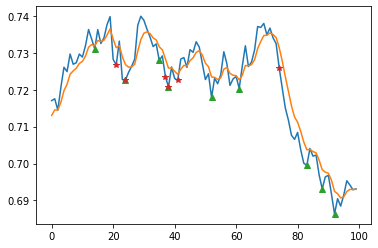

In [160]:
# Visualization
plt.plot(windowed_test_adj_close)
plt.plot(windowed_test_ema)
plt.plot(windowed_test_target_indices, windowed_test_adj_close[windowed_test_target_indices], "^")
plt.plot(windowed_prediction_indices, windowed_test_adj_close[windowed_prediction_indices], "*")

In [ ]:
## Algorithm 1 - Random Forests

In [ ]:
# Imports
from sklearn.ensemble import RandomForestRegressor

# Constants
number_of_trees = 100

In [ ]:
# Training
rf = RandomForestRegressor(n_estimators=number_of_trees, random_state=42)
rf.fit(train_predictors, train_targets)

In [ ]:
# Test Set Prediction
predictions = rf.predict(test_predictors)

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_targets)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Points.')

In [ ]:
manual_comparison = pd.DataFrame({
    'Predictions': predictions,
    'Actual': test_targets,
})

#list(manual_comparison.to_numpy())

In [ ]:
pruning_constant = 100
pruned_predictions = predictions[:pruning_constant]
pruned_test_targets = test_targets[:pruning_constant]
plt.plot(pruned_predictions, c="r")
plt.plot(pruned_test_targets, c="y")
plt.show()

In [ ]:
### Performance Visualization

In [ ]:
test_target_indices = list(np.where(test_targets == 1)[0])

# Threshold Constants
thresholded_prediction_indices = list(np.where(predictions > 0.40)[0])

In [ ]:
adj_close = test_predictors["Adj Close"].to_numpy()

In [ ]:
# Constants
pruning_constant = 300

# Pruning for vizualization
test_target_indices = np.array(test_target_indices)
thresholded_prediction_indices = np.array(thresholded_prediction_indices)

test_target_indices = test_target_indices[test_target_indices < pruning_constant]
thresholded_prediction_indices = thresholded_prediction_indices[thresholded_prediction_indices < pruning_constant]
adj_close = adj_close[:pruning_constant]

In [ ]:
# Visualization
plt.plot(adj_close)
plt.plot(test_target_indices, adj_close[test_target_indices], "^")
plt.plot(thresholded_prediction_indices, adj_close[thresholded_prediction_indices], "*")

In [ ]:
#### Importnace Visualization

In [ ]:
importance_data = ""

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for
                       feature, importance in
                       zip(predictors_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
# Print out the feature and importances
importance_data = ['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]
feature_importances
# for pair in feature_importances:
#     print(pair[0] + " : " + str(pair[1]))
#print(feature_importances)

# creating the dataset
labels = []
values = []
for pair in feature_importances:
    labels.append(pair[0])
    values.append(pair[1])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, color ='maroon', width = 0.75)

plt.xlabel("Predictor")
plt.ylabel("Importance")
plt.title("Predictor Importance")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

plt.show()

In [ ]:
importance_data = ""

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for
                       feature, importance in
                       zip(predictors_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
# Print out the feature and importances
importance_data = ['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]
feature_importances
# for pair in feature_importances:
#     print(pair[0] + " : " + str(pair[1]))
#print(feature_importances)

In [162]:
# creating the dataset
labels = []
values = []
for pair in feature_importances:
    labels.append(pair[0])
    values.append(pair[1])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, color ='maroon', width = 0.75)

plt.xlabel("Predictor")
plt.ylabel("Importance")
plt.title("Predictor Importance")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

plt.show()

NameError: name 'feature_importances' is not defined

## Algorithm 4 - RNNs